In [688]:
import pandas as pd

In [689]:
df = pd.read_csv('Train.csv')

In [690]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [691]:
print(df.isna().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


In [692]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [693]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


## **INITIAL EDA**

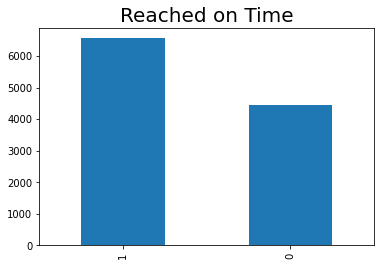

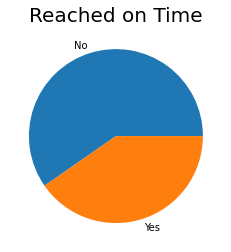

In [694]:
import matplotlib.pyplot as plt
%matplotlib inline


df['Reached.on.Time_Y.N'].value_counts().plot.bar()
plt.title('Reached on Time', fontsize=20)
plt.show()
import matplotlib.pyplot as plt
%matplotlib inline
#Reached on Time -> 1= No, 0= Yes
plt.pie(df['Reached.on.Time_Y.N'].value_counts(), labels=['No', 'Yes'])
plt.title('Reached on Time', fontsize=20)

plt.show()

In [695]:
model_features = df.columns.drop('Reached.on.Time_Y.N')
categorical_features = df[model_features].select_dtypes(include='object').columns
numerical_features = df[model_features].select_dtypes(include=np.number).columns
print('Categorical columns:',categorical_features)
print('Numerical columns:',numerical_features)

Categorical columns: Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')
Numerical columns: Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')


Warehouse_block


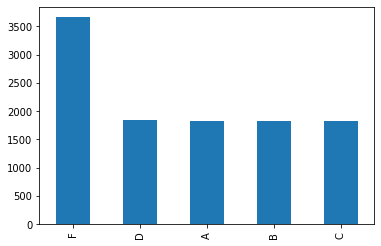

Mode_of_Shipment


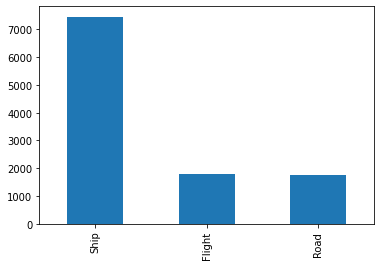

Product_importance


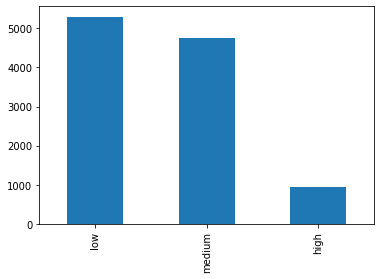

Gender


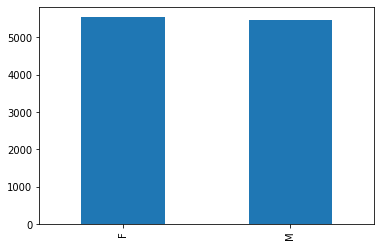

In [696]:
for i in categorical_features:
    if len(df[i].value_counts()) < 20:
        print(i)
        df[i].value_counts().plot.bar()
        plt.show()

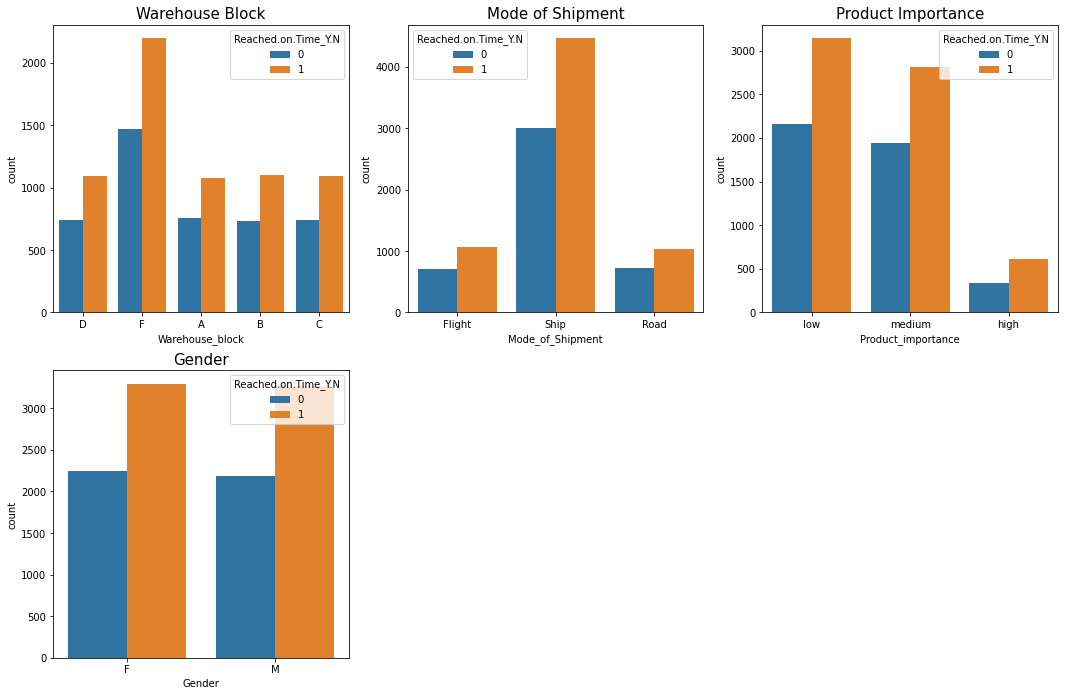

In [697]:
import seaborn as sns
plt.figure(figsize=(18, 18))

plt.subplot(3, 3, 1)
sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=df)
plt.title('Warehouse Block', fontsize=15)

plt.subplot(3, 3, 2)
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df)
plt.title('Mode of Shipment', fontsize=15)

plt.subplot(3, 3, 3)
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N',  data=df)
plt.title('Product Importance', fontsize=15)

plt.subplot(3, 3, 4)
sns.countplot(x='Gender', hue='Reached.on.Time_Y.N',  data=df)
plt.title('Gender', fontsize=15)

plt.show()

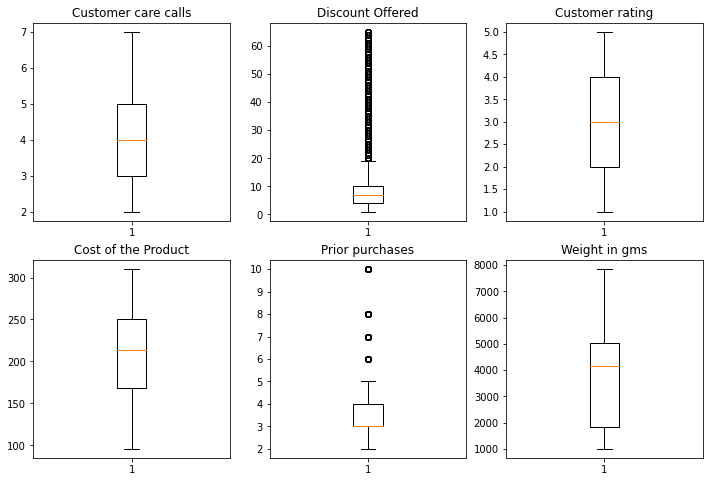

In [698]:
#boxplots visualizing the different variables
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.boxplot(df['Customer_care_calls'])
plt.title('Customer care calls')

plt.subplot(2, 3, 2)
plt.boxplot(df['Discount_offered'])
plt.title('Discount Offered')

plt.subplot(2, 3, 3)
plt.boxplot(df['Customer_rating'])
plt.title('Customer rating')

plt.subplot(2, 3, 4)
plt.boxplot(df['Cost_of_the_Product'])
plt.title('Cost of the Product')

plt.subplot(2, 3, 5)
plt.boxplot(df['Prior_purchases'])
plt.title('Prior purchases')

plt.subplot(2, 3, 6)
plt.boxplot(df['Weight_in_gms'])
plt.title('Weight in gms')

plt.show()

In [699]:
pd.get_dummies(df).corr()['Reached.on.Time_Y.N'].sort_values(ascending=True)

ID                          -0.411822
Weight_in_gms               -0.268793
Cost_of_the_Product         -0.073587
Customer_care_calls         -0.067126
Prior_purchases             -0.055515
Product_importance_medium   -0.011099
Warehouse_block_A           -0.009317
Mode_of_Shipment_Road       -0.007671
Product_importance_low      -0.007667
Gender_F                    -0.004689
Warehouse_block_C            0.000132
Warehouse_block_D            0.000830
Warehouse_block_F            0.002568
Mode_of_Shipment_Ship        0.002577
Mode_of_Shipment_Flight      0.004371
Gender_M                     0.004689
Warehouse_block_B            0.005106
Customer_rating              0.013119
Product_importance_high      0.033242
Discount_offered             0.397108
Reached.on.Time_Y.N          1.000000
Name: Reached.on.Time_Y.N, dtype: float64

In [734]:
# 'Discount Offered' seems to be very strongly correlated to the target
# judging bythe boxplots, I suspect there to be outliers here
# I will drop this column for now for the purpose of this milestone and explore this later
#df = df.drop(['Discount_offered'], axis = 1)
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,0,1,44,1233,1
1,2,1,0,4,5,216,2,0,0,59,3088,1
2,3,6,0,2,2,183,4,0,0,48,3374,1
3,4,5,0,3,3,176,4,1,0,10,1177,1
4,5,4,0,2,2,184,3,1,1,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,6,1,4,1,252,5,1,1,1,1538,1
10995,10996,5,1,4,1,232,5,1,1,6,1247,0
10996,10997,4,1,5,4,242,5,0,1,4,1155,0
10997,10998,1,1,5,2,223,6,1,0,2,1210,0


# **BUILDING A KNN MODEL**

In [735]:
input_data = df[["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", "Customer_rating", "Cost_of_the_Product", "Prior_purchases", "Product_importance", "Weight_in_gms"]]
model_target = df['Reached.on.Time_Y.N']

In [736]:
#want to replace all categorical data with numeric values so I can use if to train and test the model
df=df.replace(to_replace="Flight",value=0)
df=df.replace(to_replace="Ship",value=1)
df=df.replace(to_replace="Road",value=2)
df['Mode_of_Shipment'] = pd.to_numeric(df['Mode_of_Shipment'])

df=df.replace(to_replace="low",value=0)
df=df.replace(to_replace="medium",value=1)
df=df.replace(to_replace="high",value=2)
df['Product_importance'] = pd.to_numeric(df['Product_importance'])

df=df.replace(to_replace="A",value=6)
df=df.replace(to_replace="B",value=5)
df=df.replace(to_replace="C",value=4)
df=df.replace(to_replace="D",value=3)
df=df.replace(to_replace="E",value=2)
df=df.replace(to_replace="F",value=1)
df['Warehouse_block'] = pd.to_numeric(df['Warehouse_block'])

df=df.replace(to_replace="M",value=0)
df=df.replace(to_replace="F",value=1)
df['Gender'] = pd.to_numeric(df['Gender'])
df.dtypes


ID                     int64
Warehouse_block        int64
Mode_of_Shipment       int64
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int64
Gender                 int64
Discount_offered       int64
Weight_in_gms          int64
Reached.on.Time_Y.N    int64
dtype: object

In [737]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 1)

classifier.fit(input_data, model_target)

KNeighborsClassifier(n_neighbors=1)

In [738]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,0,1,44,1233,1
1,2,1,0,4,5,216,2,0,0,59,3088,1
2,3,6,0,2,2,183,4,0,0,48,3374,1
3,4,5,0,3,3,176,4,1,0,10,1177,1
4,5,4,0,2,2,184,3,1,1,46,2484,1


In [739]:
import numpy as np

data_sample = np.array([[5, 0, 2, 4, 250, 4, 2, 2067]])

# Use the fitted model to make predictions on sample data
print(classifier.predict(data_sample))

[1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [740]:
#model predicts that this order will not be delivered on time

In [741]:
import numpy as np
from sklearn.model_selection import train_test_split

# **Train/Test Split**

In [718]:
df.shape

(10999, 12)

In [742]:
df.dtypes

ID                     int64
Warehouse_block        int64
Mode_of_Shipment       int64
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int64
Gender                 int64
Discount_offered       int64
Weight_in_gms          int64
Reached.on.Time_Y.N    int64
dtype: object

In [743]:
#using an 90/10 split
training_data = df.iloc[:9900, :]
test_data = df.iloc[9900:, :]

training_data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,0,1,44,1233,1
1,2,1,0,4,5,216,2,0,0,59,3088,1
2,3,6,0,2,2,183,4,0,0,48,3374,1
3,4,5,0,3,3,176,4,1,0,10,1177,1
4,5,4,0,2,2,184,3,1,1,46,2484,1


In [744]:
from sklearn.neighbors import KNeighborsClassifier

X_train = training_data[["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", "Customer_rating", "Cost_of_the_Product", "Prior_purchases", "Product_importance", "Weight_in_gms"]].values
y_train = training_data["Reached.on.Time_Y.N"].tolist()

classifier = KNeighborsClassifier(n_neighbors = 1)

classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [745]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Use the fitted model to make predictions on the same dataset
train_predictions = classifier.predict(X_train)

print('Model evaluation on the training set: \n')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Training accuracy:", accuracy_score(y_train, train_predictions))

Model evaluation on the training set: 

[[3810    0]
 [   0 6090]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3810
           1       1.00      1.00      1.00      6090

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900

Training accuracy: 1.0


In [746]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

X_test = test_data[["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", "Customer_rating", "Cost_of_the_Product", "Prior_purchases", "Product_importance", "Weight_in_gms"]].values
y_test = test_data["Reached.on.Time_Y.N"].tolist()

# Use the fitted model to make predictions on the test dataset
test_predictions = classifier.predict(X_test)

print('Model evaluation on the training set: \n')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Training accuracy:", accuracy_score(y_test, test_predictions))

Model evaluation on the training set: 

[[351 275]
 [263 210]]
              precision    recall  f1-score   support

           0       0.57      0.56      0.57       626
           1       0.43      0.44      0.44       473

    accuracy                           0.51      1099
   macro avg       0.50      0.50      0.50      1099
weighted avg       0.51      0.51      0.51      1099

Training accuracy: 0.5104640582347588


In [747]:
#split training data into two sets: Training (90%) and Validation (10%)

train_data = training_data.iloc[:8910, :] #90%
val_data = training_data.iloc[8910:, :] #10%

X_train = train_data[["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", "Customer_rating", "Cost_of_the_Product", "Prior_purchases", "Product_importance", "Weight_in_gms"]].values
y_train = train_data["Reached.on.Time_Y.N"].tolist()

X_val = val_data[["Warehouse_block", "Mode_of_Shipment", "Customer_care_calls", "Customer_rating", "Cost_of_the_Product", "Prior_purchases", "Product_importance", "Weight_in_gms"]].values
y_val =val_data["Reached.on.Time_Y.N"].tolist()

In [748]:
K_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for K in K_values:
    classifier = KNeighborsClassifier(n_neighbors = K)
    classifier.fit(X_train, y_train)
    val_predictions = classifier.predict(X_val)
    print("K=%d, Validation accuracy score: %f" % (K, accuracy_score(y_val, val_predictions)))

K=1, Validation accuracy score: 0.503030
K=2, Validation accuracy score: 0.548485
K=3, Validation accuracy score: 0.508081
K=4, Validation accuracy score: 0.537374
K=5, Validation accuracy score: 0.501010
K=6, Validation accuracy score: 0.521212
K=7, Validation accuracy score: 0.488889
K=8, Validation accuracy score: 0.516162
K=9, Validation accuracy score: 0.525253
K=10, Validation accuracy score: 0.539394


In [749]:
classifier = KNeighborsClassifier(n_neighbors = 2)
classifier.fit(X_train, y_train)
test_predictions = classifier.predict(X_test)
print("Test accuracy score: %f" % (accuracy_score(y_test, test_predictions)))

Test accuracy score: 0.555960
